# Overview

The purpose of this file is to show that the $16$ weak stability conditions that are not given by a $\phi$ for the graph $F$ (given by Filippo Viviani) in the thesis are strong stability conditions.

# Table of contents

1. [Functions](#s1)
2. [Triangle graph example](#s2)
3. [For $F$ weak stability conditions which are not classical are strong](#s3)

# Functions <a name="s1"></a>

In [3]:
import pickle
import numpy as np

The following function takes a graph $G$ (actually the sandpile group for graph) and a set of divisors (usually $\sigma_{\Gamma}^{A_{\G}}(G)$) and puts the set of divisors into dictionary format so we can apply is_linearly_equivalent().

In [5]:
def get_sig_lst(S,lbm):
    
    """
    Objective:Get divisors of sigma_{Gamma}(Gamma) into the correct format to apply is_linearly_equivalent
    
    Input:
    S:sandpile group for graph
    lbm: the list of divisors [d1,...,dn] in sigma_{Gamma}(Gamma)
    
    Returns: the list of divisors in sigma_{Gamma}(Gamma) in the form d={0: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1}
    """
    
    sig_lst=[]
    for d in lbm:
        ld=[int(x) for x in d] # change numpy float to list of ints
        n=len(ld)

        dict_pairs=[] #to build dict for sandpiledivisors
        for i in range(1,n+1):
            if i ==1:
                dict_pairs.append((i-1,ld[i-1]))
            else:
                dict_pairs.append((i,ld[i-1]))

        d_dict=dict(dict_pairs)

        sig_lst.append(SandpileDivisor(S,d_dict))
    return sig_lst

In [6]:
def return_to_list(d):
    
    """
    Objective:
    Input: 
    d: a divisor of the form d={0: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1}
    
    Returns:
    return divisor for sandpile back to list so can check those that are linearly equivelent.

    """
        
    
#     d={0: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1}
    n=len(d)
    ld_first=[d[0]]
    ld_top=[d[i] for i in range(2,n+1)]
    ld=ld_first+ld_top
    return ld

The following function considers every pair of divisors in the set of divisors and asks if they are chip-firing linearly independant.

In [9]:
def lbm_csr(sig_lst):
    """
    Objective: Check which if each pair of items in chip firing depenedand or independant.
    
    Input:
    sig_lst: the list of divisors sigma_{Gamma}(Gamma).
    
    Returns:
    whether the list of divisors of sigma_{Gamma}(Gamma) are Independant or Dependant and the list of those that are chip-firing dependnat.
    """
    
    
    lst=set([])
    equivlent_pairs=[]
    for item1 in sig_lst:
        for item2 in sig_lst:
            if item1==item2:
                pass
            else:
#                 print(f"item1: {item1}, item2: {item2}")
#                 print("equiv?",item1.is_linearly_equivalent(item2))
                lst.add(item1.is_linearly_equivalent(item2))
                if item1.is_linearly_equivalent(item2)==True:
                    equivlent_pairs.append((return_to_list(item1),return_to_list(item2)))
    #     print("All elements are chip-firing independant if only false below, else there exists a linearly dependant pair.")
    
#     we record those pairs that are equivlent

    rem_same_pairs_equivlent_pairs=[] # elements of equivlent_pairs that are same up to ordering
    for i in equivlent_pairs:
        if (i[1],i[0]) in rem_same_pairs_equivlent_pairs:
            continue
        else:
            rem_same_pairs_equivlent_pairs.append(i)

#     print(lst)
    if len(lst)<2:
        x="Independant"
    else:
        x="Dependant"
    
    if len(rem_same_pairs_equivlent_pairs)>0:
        print("The following are terms which are chip-firing equivelent")
        for i in rem_same_pairs_equivlent_pairs:
            print(i)
    
    return x,rem_same_pairs_equivlent_pairs

The function main repeats lbm_csr() for a list of sets of divisors.

In [10]:
def main(S,data):
    
    """
    Objective:
    
    Given a list of stability conditions checks if each is a  complete set of representatives for chip-firing action
    
    Input:
    S: sandpile group for the graph.
    data: List of stability conditions to be checked
    
    Returns:
    
    Prints 
    Total number of cases 
    Number of cases that are Dependant
    Number of cases that are Independant 
    """
        

    Indys=[]
    Dependors=[]

    for index,lbm in enumerate(data):
        print(f"WSC: {index} Complete")
        #put into sandpiledivisors form
        sig_lst=get_sig_lst(S,lbm)
#         print(sig_lst[0])
        
        #check if indy or dependant
        check=lbm_csr(sig_lst)
        check=check[0]
    #     print(index,check)

        if check=="Dependant":
            Dependors.append(index)
        elif check=="Independant":
            Indys.append(index)

    print(f"Total number of cases {len(data)}")
    print(f"Number of cases that are Dependant {len(Dependors)}")
    print(f"Number of cases that are Independant {len(Indys)}")
    return

# Triangle graph example <a name="s2"></a>

Before we consider the stability conditions not given by a $\phi$, let us first show the stability conditions, $\sigma_{\Gamma}$, for the triangle graph $\Gamma:=I_3$ are strong stability conditions. In order to show this we show that pairwise $\vec{d} \in \sigma_{\Gamma}(\Gamma)$ are chip-firing independent.

Consider the graph $\Gamma:=I_3$

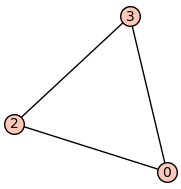

In [11]:
## I3 test for depenant

g={0:{2:1,3:1},2:{0:1,3:1},3:{0:1,2:1}}
S=Sandpile(g,0)
# S.show(figsize=3, edge_labels=true)
S.show(figsize=3)

Here are the two sets of $\sigma_{\Gamma}(\Gamma)$ up to translation, and a chip-firing dependant case.

In [19]:
I3_data=[[[0,0,0],[-1,0,1],[-1,0,1]]]
check=main(S,I3_data)

WSC: 0 Complete
Total number of cases 1
Number of cases that are Dependant 0
Number of cases that are Independant 1


In [20]:
I3_data=[[[1,0,0],[0,0,1],[0,1,0]]]
check=main(S,I3_data)

WSC: 0 Complete
Total number of cases 1
Number of cases that are Dependant 0
Number of cases that are Independant 1


In [21]:
#List chip-firing dependant divisors.
I3_data=[[[0,0,0],[2,-1,-1],[-1,0,1]]] #chip firing equiv
check=main(S,I3_data)

WSC: 0 Complete
The following are terms which are chip-firing equivelent
([0, 0, 0], [2, -1, -1])
Total number of cases 1
Number of cases that are Dependant 1
Number of cases that are Independant 0


# For $F$, weak stability conditions which are not classical are strong <a name="s3"></a>

Let $\Gamma$ be the graph $F$ given in the thesis.

We now apply the same process to each of the $16$ (weak) stability conditions $\sigma_{\Gamma}$. 

We will see that each $\sigma_{\Gamma}(\Gamma)$ is a complete set of representatives for the chip-firing action, and so each $\sigma_{\Gamma}$ is a strong stability condition.

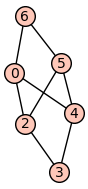

In [22]:
#Graph of FV examples
#For some reason the vertex 1 is vert 0 here, vert 1 is vert 2 and so on. I dont know why it has to be this way.

g={0:{2:1,4:1,6:1},
   
   2:{0:1,3:1,5:1},
   
   3:{2:1,4:1},
   
   4:{0:1,3:1,5:1},
   
   5:{2:1,4:1,6:1},
   
   6:{5:1,0:1}}

S=Sandpile(g,0)
# S.show(figsize=3, edge_labels=true)
S.show(figsize=3)

In [23]:
pickle_in = open(r"FV_G6M3M14_degen.pkl", "rb")
# "FV_G6M3M14\FV_G6M3M14_degen.pkl"

data = pickle.load(pickle_in)
pickle_in.close()

In [24]:
#get all the sigma data as a list of list of divisors on the top: sigma_G(G).
sig_l=[]
for i in data:
    sig=i[1].tolist()
    sig_l.append(sig)

In [25]:
check=main(S,sig_l)

WSC: 0 Complete
WSC: 1 Complete
WSC: 2 Complete
WSC: 3 Complete
WSC: 4 Complete
WSC: 5 Complete
WSC: 6 Complete
WSC: 7 Complete
WSC: 8 Complete
WSC: 9 Complete
WSC: 10 Complete
WSC: 11 Complete
WSC: 12 Complete
WSC: 13 Complete
WSC: 14 Complete
WSC: 15 Complete
Total number of cases 16
Number of cases that are Dependant 0
Number of cases that are Independant 16
